In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
%matplotlib inline
import statsmodels.formula.api as smf

In [2]:
# One feature Simple linear regression

In [3]:
data=pd.read_csv("Advertisement.csv")
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
data.shape

(200, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
data.isna().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

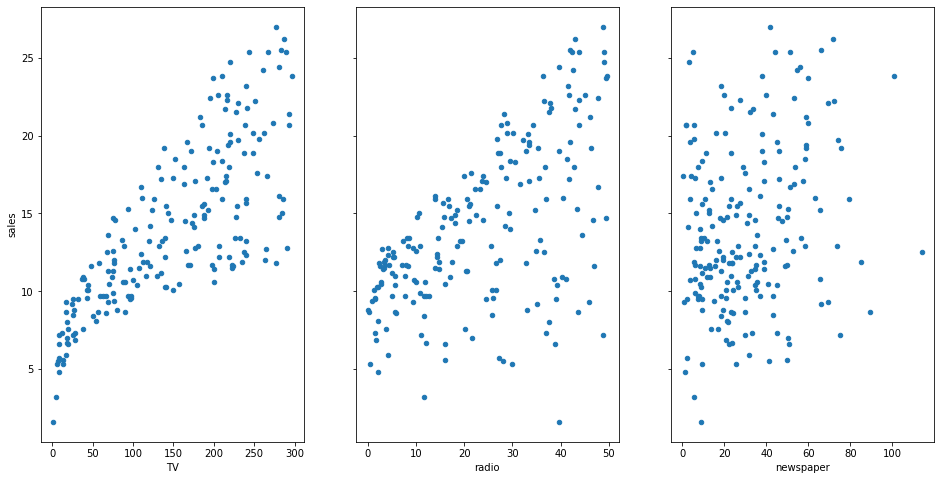

In [7]:
fig,axe=plt.subplots(1,3,sharey=True)
data.plot(kind='scatter',x='TV',y='sales',ax=axe[0],figsize=(16,8))
data.plot(kind='scatter',x='radio',y='sales',ax=axe[1])
data.plot(kind='scatter',x='newspaper',y='sales',ax=axe[2])
fig.savefig('testdata.jpg')

In [8]:

# create x=features and y=label
x=data[['TV']]
y=data.sales

# follow the usual sklearn pattern:import,instantiate,fit

from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x,y)
# print intercept  and coefficient
print(lm.intercept_)
print(lm.coef_)


7.032593549127694
[0.04753664]


In [9]:
#y=mx+c
# increase in 50k in add
y=.04753664*50+7.032593549127694
y


9.409425549127693

In [10]:
# lets create the dataframe since model expects it
x_new=pd.DataFrame({'TV':[50]})
x_new.head()

,TV
0,50


In [11]:
lm.predict(x_new)

array([9.40942557])

In [12]:
x_new=pd.DataFrame({'TV':[data.TV.min(),data.TV.max()]})
x_new

,TV
0,0.7
1,296.4


In [13]:
preds=lm.predict(x_new)
preds

array([ 7.0658692 , 21.12245377])

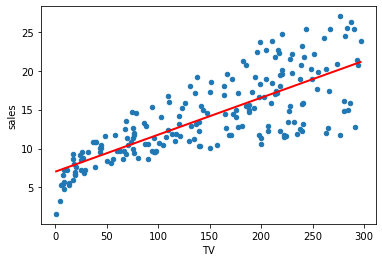

In [14]:
data.plot(kind='scatter',x='TV',y='sales')
plt.plot(x_new,preds,c='red',linewidth=2)



In [23]:
# features =1
# R square

# 1-RSS/TSS  residual sum of square  ,total sum of  sqaure 
# R square adjusted 
#range  0 to 1


# Features>1

# 1-(1-r**2)(N-1)/N-P-1
# predictor=p

#range 0 to 1

In [24]:
lm.score

<bound method RegressorMixin.score of LinearRegression()>

In [25]:
# Multiple  Linear Regression
#y=c+C1X1+....+CnXn


In [26]:
x=data[['TV','radio','newspaper']]
y=data.sales
lm=LinearRegression()
lm.fit(x,y)

print ('Intercept : ->',lm.intercept_)
print ('TV :        ->',lm.coef_[0])
print ('radio :     ->',lm.coef_[1])
print ('Newspaper : ->',lm.coef_[2])


Intercept : -> 2.9388893694594103
TV :        -> 0.0457646454553976
radio :     -> 0.18853001691820453
Newspaper : -> -0.0010374930424763176


In [29]:
lm=smf.ols(formula= 'sales ~ TV+radio+newspaper',data=data).fit()
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 26 Apr 2021   Prob (F-statistic):           1.58e-96
Time:                        07:56:08   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
lm=smf.ols(formula= 'sales ~ TV+radio',data=data).fit()
lm.conf_int()
lm.summary()
lm.rsquared

0.8971942610828956

In [33]:
lm=smf.ols(formula= 'sales ~ TV+radio+newspaper',data=data).fit()
lm.conf_int()
lm.summary()
lm.rsquared

0.8972106381789522

In [42]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pickle


In [35]:
data =pd.read_csv(r'D:\Datatrained\Statistics\Admission .csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [36]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [37]:
# Fill the null valures

data['University Rating']=data['University Rating'].fillna(data['University Rating'].mode()[0])
data['TOEFL Score']=data['TOEFL Score'].fillna(data['TOEFL Score'].mean())
data['GRE Score']=data['GRE Score'].fillna(data['GRE Score'].mean())
 # Verify nan
data.describe()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.118000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.103952,6.051338,1.128993,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,309.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,316.558763,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,324.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [39]:
# popping
data=data.drop(columns=['Serial No.'])
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65


C:\Users\sumit\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sumit\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sumit\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

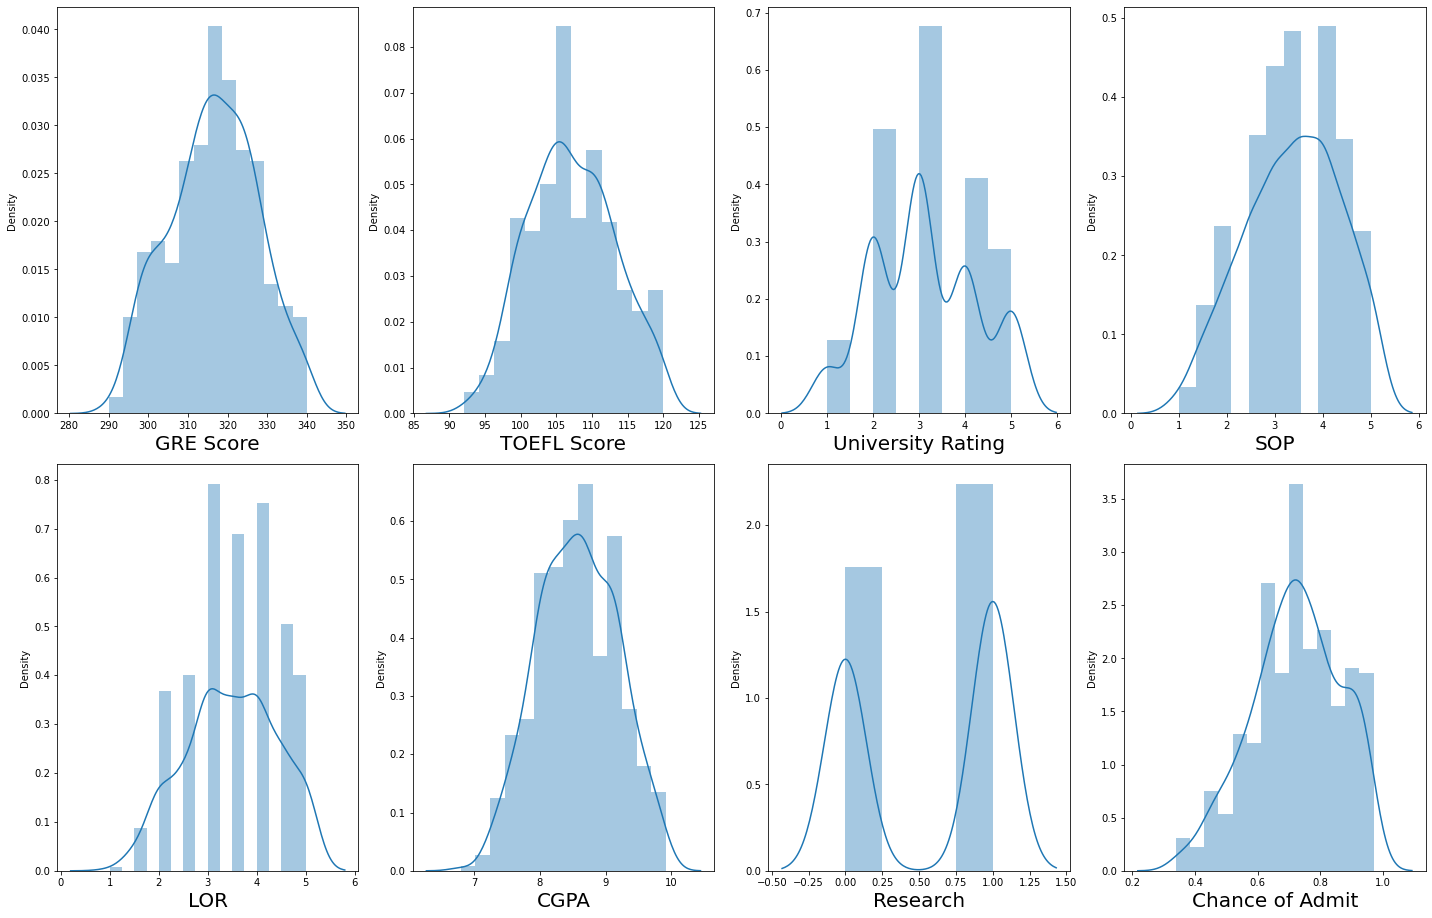

In [73]:
#EDA

plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in data:
    if plotnumber<=16:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
       
    
    plotnumber+=1
plt.tight_layout()                   
                    
    


In [ ]:
# dataset into features and label

In [74]:
y=data['Chance of Admit']
x=data.drop(columns=['Chance of Admit'])

In [75]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit, Length: 500, dtype: float64

In [76]:
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337.000000,118.0,4.0,4.5,4.5,9.65,1
1,324.000000,107.0,4.0,4.0,4.5,8.87,1
2,316.558763,104.0,3.0,3.0,3.5,8.00,1
3,322.000000,110.0,3.0,3.5,2.5,8.67,1
4,314.000000,103.0,2.0,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332.000000,108.0,5.0,4.5,4.0,9.02,1
496,337.000000,117.0,5.0,5.0,5.0,9.87,1
497,330.000000,120.0,5.0,4.5,5.0,9.56,1
498,312.000000,103.0,4.0,4.0,5.0,8.43,0


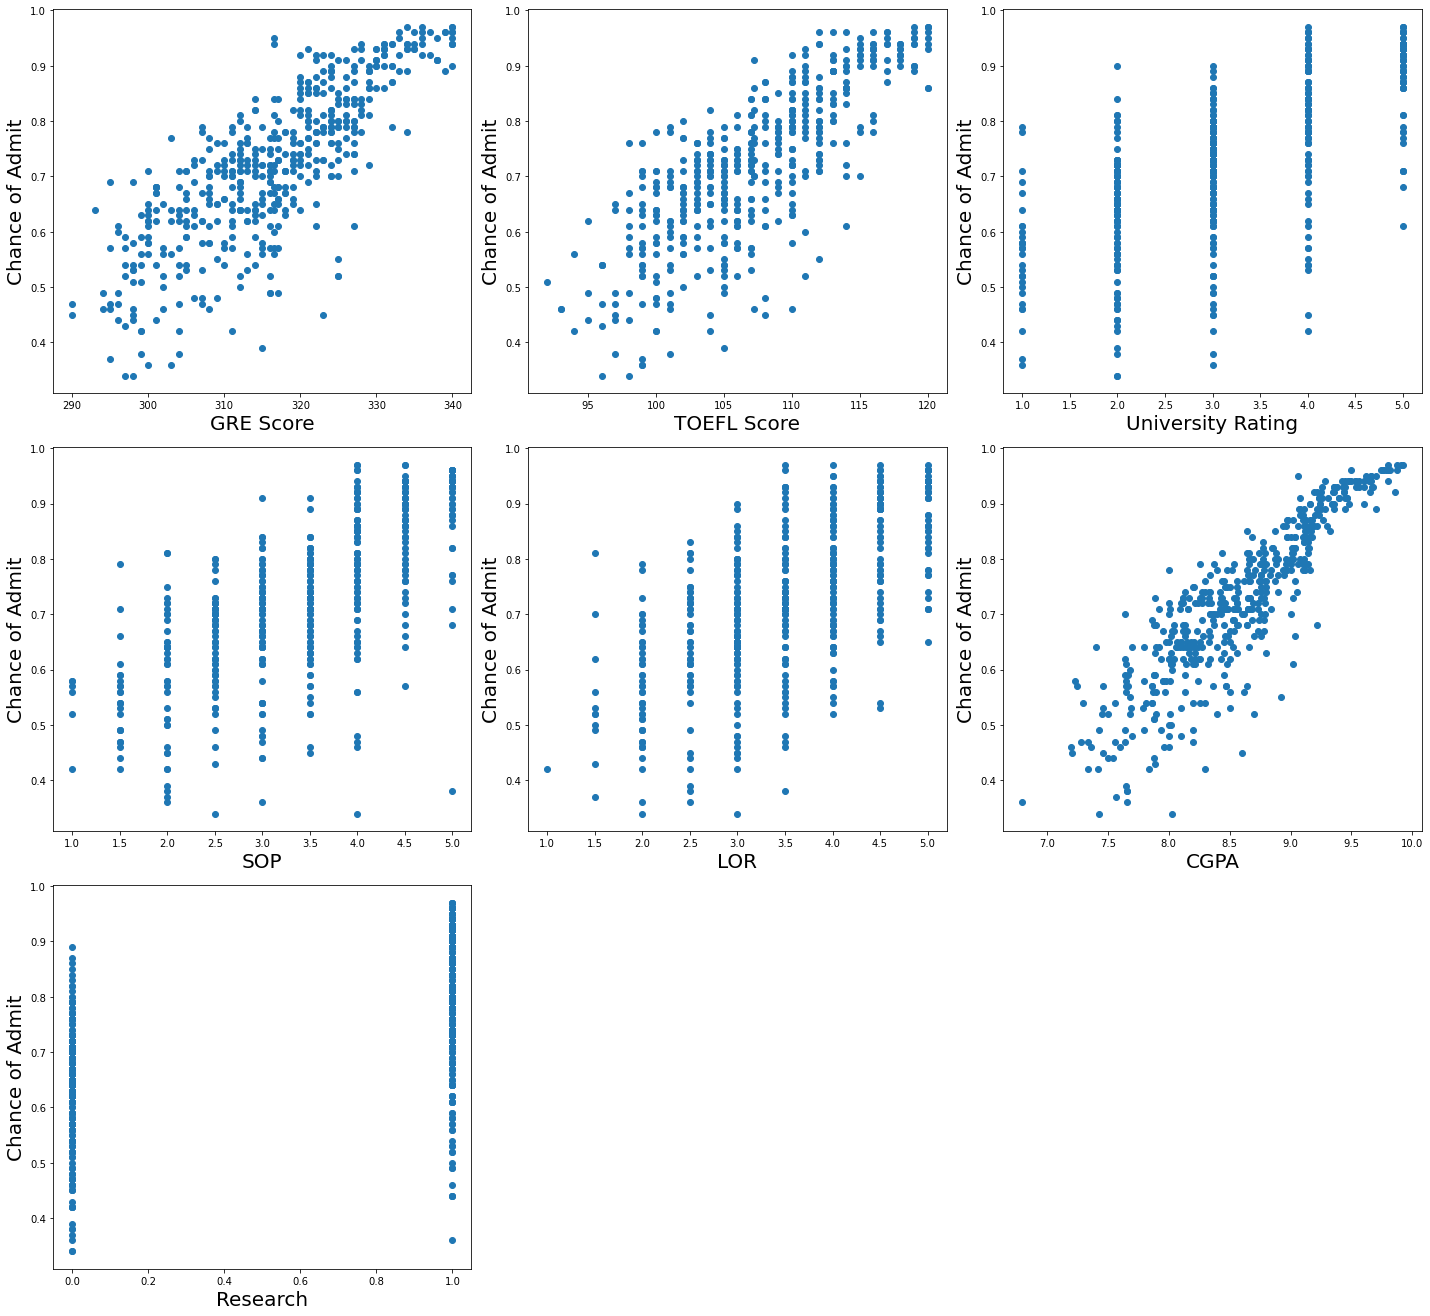

In [107]:
# Visualizing relationship



plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1

for column in x:
    if plotnumber<=15:
        ax=plt.subplot(5,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Chance of Admit',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [108]:
# Data Scalimg. Formula Z=(x-mean)/std
scaler=StandardScaler()
X_scaled=scaler.fit_transform(x)
   


In [ ]:
#fit_transform?

In [109]:
# How does scale data looks like
X_scaled

array([[ 1.84274116e+00,  1.78854223e+00,  7.82009548e-01, ...,
         1.09894429e+00,  1.77680627e+00,  8.86405260e-01],
       [ 6.70814288e-01, -3.10581135e-02,  7.82009548e-01, ...,
         1.09894429e+00,  4.85859428e-01,  8.86405260e-01],
       [ 5.12433309e-15, -5.27312752e-01, -1.04622593e-01, ...,
         1.73062093e-02, -9.54042814e-01,  8.86405260e-01],
       ...,
       [ 1.21170361e+00,  2.11937866e+00,  1.66864169e+00, ...,
         1.63976333e+00,  1.62785086e+00,  8.86405260e-01],
       [-4.10964364e-01, -6.92730965e-01,  7.82009548e-01, ...,
         1.63976333e+00, -2.42366993e-01, -1.12815215e+00],
       [ 9.41258951e-01,  9.61451165e-01,  7.82009548e-01, ...,
         1.09894429e+00,  7.67219636e-01, -1.12815215e+00]])

In [127]:
# split data into train and test. Model will be built on training data and tested on test data
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=20)
y_train.head()

418    0.60
107    0.91
92     0.34
354    0.59
431    0.73
Name: Chance of Admit, dtype: float64

In [128]:
#train and tested?

In [129]:
# training the Model
regression=LinearRegression()

In [130]:
regression.fit(x_train,y_train)

LinearRegression()

In [131]:
#Predict the chance of Admission given features

print('chance of admission is :', regression.predict(scaler.transform([[314,103,2,2,3,8.21,0]])))

chance of admission is : [0.62971236]


In [132]:
# saving model to local system
filename='finalized_model.picle'
pickle.dump(regression,open(filename,'wb'))

# prediction using the saved model

loaded_model=pickle.load(open(filename,'rb'))
a=loaded_model.predict(scaler.transform([[314,103,2,2,3,8.21,0]]))
a

array([0.62971236])

In [133]:
# lets check how well model fits 

#Adjusted R2 SCORE
regression.score(x_train,y_train)

0.8284374922697593

In [134]:
#Lets check how well model fits the test data
regression.score(x_test,y_test)

0.7951907354248762

In [135]:
y_pred=regression.predict(x_test)

In [136]:
y_pred

array([0.88723278, 0.65560176, 0.94608492, 0.8328879 , 0.51592876,
       0.64247939, 0.63792683, 0.88913422, 0.48693949, 0.85883351,
       0.58160216, 0.80764775, 0.56577309, 0.54533381, 0.51980537,
       0.78237726, 0.719698  , 0.86176189, 0.55234276, 0.65576662,
       0.71482088, 0.47530713, 0.72305919, 0.80547008, 0.90513542,
       0.64131756, 0.54903213, 0.65117654, 0.93596745, 0.70028769,
       0.68980948, 0.59750276, 0.81643564, 0.58420715, 0.85519653,
       0.64125726, 0.80317903, 0.5365615 , 0.65279668, 0.66851354,
       0.96180228, 0.82678529, 0.70808486, 0.76400978, 0.7655561 ,
       0.71709857, 0.74560713, 0.93266141, 0.89758684, 0.47405736,
       0.65950441, 0.6339577 , 0.72959349, 0.68432646, 0.60917994,
       0.65285237, 0.82715146, 0.72797175, 0.78420525, 0.783788  ,
       0.86543553, 0.75447437, 0.94189308, 0.92636264, 0.69507832,
       0.55159534, 0.86350856, 0.66866363, 0.64247972, 0.72696492,
       0.77721783, 0.84142812, 0.52014683, 0.72968463, 0.73069

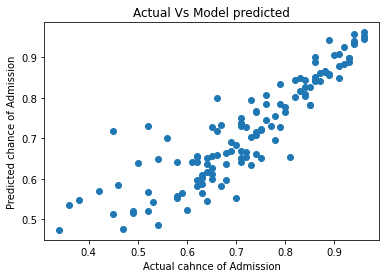

In [137]:
#lets plot and visualize
plt.scatter(y_test,y_pred)
plt.xlabel('Actual cahnce of Admission')
plt.ylabel('Predicted chance of Admission')
plt.title('Actual Vs Model predicted')
plt.show()

In [ ]:
# Model evaluation Technique
# Metrics

# Mean absolute Square(MAE): Reprsentb average error
#Mean Squared error(MSE):
#Root mean squarred error(RMSE):

#see the diffrence ?

In [138]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [139]:
y_pred=regression.predict(x_test)

In [140]:
mean_absolute_error(y_test,y_pred)

0.04647076776772614

In [141]:
mean_squared_error(y_test,y_pred)

0.004296637525706735

In [142]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.06554874160277019

In [ ]:
# lets see model is overfitting training data

In [ ]:
#Regulalization

# Lasso L1
#Ridge  L2
#ELASTICNET

In [143]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

In [ ]:
# lassoCV will return best alpha after max iteration
# Normalization is substacting the mean and dividing by the l2 norm

In [144]:
lassCV= LassoCV(alphas=None,max_iter=1000,normalize=True)
lassCV.fit(x_train,y_train)

LassoCV(normalize=True)

In [145]:
# best Alpha parameter (Alpha = learning rate)
alpha =lassCV.alpha_
alpha

1.4765247723028065e-05

In [146]:
# now that we have best parameter,lets use lasso regression and see how well our data ftted befor
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=1.4765247723028065e-05)

In [147]:
lasso_reg.score(x_test,y_test)

0.795188250909729

In [149]:
# using Ridge regression model
ridgecv=RidgeCV(alphas=np.arange(.001,0.1,.01),normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [150]:
ridgecv.alpha_

0.011

In [153]:
ridge_model=Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.011)

In [154]:
ridge_model.score(x_test,y_test)

0.7951889478229252